## Final project

In [1]:
from Function import Neural_Network, NaiveBayes
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

## Create the training set and the data set

In [2]:
def createArray(file, size):
    image = Image.open(file)
    data = np.array(image).flatten()
    data = np.where(data == 0, data, 1)
    output = np.zeros(size)
    output[i] = 1
    return data, output

In [3]:
# create the 
# https://www.kaggle.com/jidhumohan/mnist-png ==> dataset

testdir = 'mnist_png/testing/'
trainingdir = 'mnist_png/training/'
training_input = list()
training_output = list()
test_input = list()
test_output = list()
size = 10
for i in range(size):
    train_directories = os.listdir(trainingdir+str(i))
    test_directories = os.listdir(testdir+str(i))
    for file in train_directories:
        data, output = createArray(trainingdir+str(i)+"/"+file, size)
        training_input.append(data)
        training_output.append(output)
        
    for file in test_directories:
        data, output = createArray(testdir+str(i)+"/"+file, size)
        test_input.append(data)
        test_output.append(output)



In [4]:
print(len(training_input))

60000


## Create a NeuralNetwork and train it with the backprog

In [5]:
def createMinibatch(input, output, size):
    minibatchin = list()
    minibatchout = list()
    delta = int(len(input)/10)
    for i in range(int(size/10)):
        index = random.randint(0, delta-1)
        for i in range(10):
            minibatchin.append(input[index+(i*delta)])
            minibatchout.append(output[index+(i*delta)])
    return minibatchin, minibatchout
    

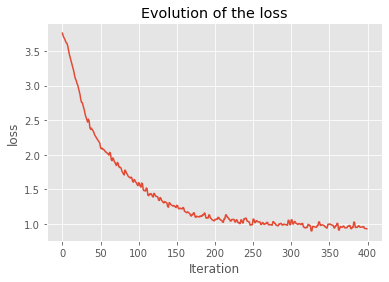

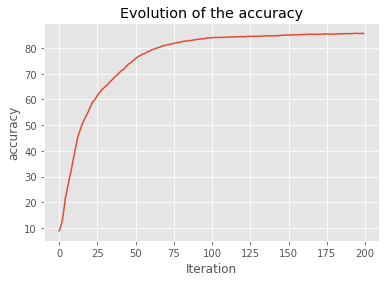

The finale accuracy is : 85.61 %


In [6]:
NN = Neural_Network(28*28, 30, size)
fromid = 0
accuracyhist = list()
for toid in range(100):
    minibatchin, minibatchout = createMinibatch(training_input, training_output, 3000)
    NN.training(np.array(minibatchin), np.array(minibatchout), .75, 2)
    accuracyhist.append(NN.accuracy(test_input, test_output))

for toid in range(100):
    minibatchin, minibatchout = createMinibatch(training_input, training_output, 3000)
    NN.training(np.array(minibatchin), np.array(minibatchout), .25, 2)
    accuracyhist.append(NN.accuracy(test_input, test_output))
    
plt.style.use('ggplot')
plt.plot(NN.loss_history)
plt.title('Evolution of the loss')
plt.ylabel('loss')
plt.xlabel('Iteration')
plt.show()

plt.style.use('ggplot')
plt.plot(accuracyhist)
plt.title('Evolution of the accuracy')
plt.ylabel('accuracy')
plt.xlabel('Iteration')
plt.show()

print('The finale accuracy is :', accuracyhist[len(accuracyhist)-1],'%')

In [7]:
NB = NaiveBayes(training_input, training_output)

In [8]:
print("The accuracy obtain is",NB.accuracy(test_input, test_output),"%")

/home/azureuser/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/azureuser/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


The accuracy obtain is 74.67 %
